# Superdense coding

Kodowanie supergęste umożliwia przesłanie dwóch klasycznych bitów za pomocą jednego kubitu. Schemat działania jest prosty a w jego wyjaśnieniu pomóc mogą Alice i Bob.

W pierwszym kroku, podobnie jak dla teleportacji, należy splątać kubity. Zarówno Alice jak i Bob dostają jeden z tych kubitów. Alice chcąc wysłać pewną wiadomość do Boba wykonuje dostosowane do treści operacje na swoim kubicie:
- $00$ - nic
- $01$ - bramka $Z$
- $10$ - bramka $X$
- $11$ - zadziałać $Z$ i $X$

Bob jest w stanie odczytać przesłaną informację poprzez zadziałanie bramkami CNOT (kubitu swojego z kubitem Alice) i Hadamard oraz pomiar.

Przykładowy schemat w przypadku kiedy wysyłana wiadomość to $10$.

![](./circuits/superdense-10.png)

In [ ]:
from openql import openql as ql
from utils import simulate, plot_histogram, random_state

In [ ]:
ql.initialize()
compiler = ql.Compiler("compiler", "./config/compiler-config.json")

platform = ql.Platform("platform", "none")
platform.set_compiler(compiler=compiler)


In [ ]:
def mess(k: ql.Kernel):
    msg = random_state(2)
    print(f'Wysłana wiadomość: {msg}')

    if msg == "01":
        k.z(0)
    if msg == "10":
        k.x(0)
    if msg == "11":
        k.z(0)
        k.x(0)


In [ ]:
nqubits = 2

sc_p = ql.Program("superdense-coding", platform, nqubits)
k = ql.Kernel("kernel", platform, nqubits)

# Splątanie kubitów
k.hadamard(0)
k.cnot(0, 1)

# Wysyłanie wiadomości
mess(k)

# Odczyt
k.cnot(1, 0)
k.hadamard(1)

k.measure(0)
k.measure(1)

sc_p.add_kernel(k)
sc_p.compile()


Wysłana wiadomość: 00


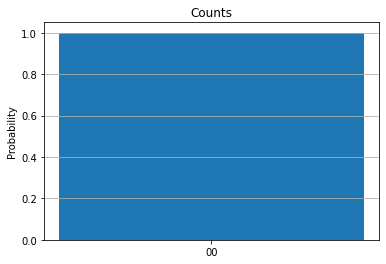

In [ ]:
counts = simulate(program=sc_p, shots=1024)
plot_histogram(counts=counts)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dedd1051-cb34-4841-b8e5-79089caae121' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>